In [1]:
# Cell 1: Load the data
import pandas as pd

# Assuming the data directory is correctly placed in relation to the notebook
news_data = pd.read_csv('../data/data.csv')

# This line ensures that the data is loaded. If there's an error after this, it's likely due to the file path.
print("Data loaded successfully. Number of rows in the dataset:", len(news_data))


Data loaded successfully. Number of rows in the dataset: 58356


In [2]:
# Cell 2: Check for missing values
missing_values = news_data.isnull().sum()
print(missing_values)


article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64


In [13]:
# Calculate summary statistics for numerical columns
summary_statistics = news_data.describe()
print(summary_statistics)


          article_id
count   58356.000000
mean   298958.734492
std    216023.477569
min       418.000000
25%    121776.500000
50%    251651.000000
75%    451541.500000
max    781308.000000


In [14]:
# Print unique values for 'source_name'
print("Unique Source Names:", news_data['source_name'].unique())

# Print unique values for 'title_sentiment'
print("Unique Title Sentiments:", news_data['title_sentiment'].unique())


Unique Source Names: ['Forbes' 'CNA' 'Time' 'Phys.Org' 'Digital Trends' 'Al Jazeera English'
 'BBC News' 'Deadline' 'Euronews' 'RT' 'The Punch'
 'International Business Times' 'The Indian Express' 'ETF Daily News'
 'ABC News' 'Globalsecurity.org' 'Marketscreener.com' 'The Times of India'
 'GlobeNewswire' 'CNN' 'Business Insider' 'Gizmodo.com' 'Wired'
 'The Verge' 'NPR' 'Boing Boing' 'Android Central' 'ReadWrite'
 'AllAfrica - Top Africa News']
Unique Title Sentiments: ['Neutral' 'Positive' 'Negative']


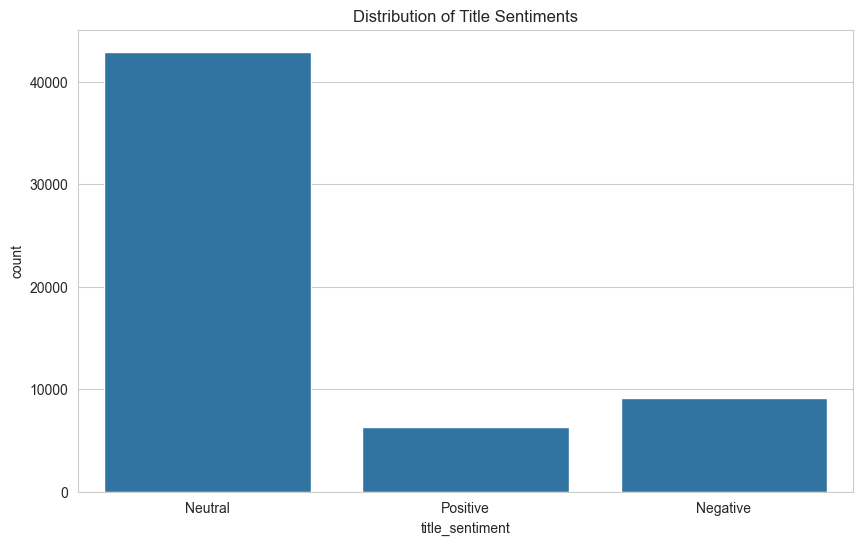

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(data=news_data, x='title_sentiment')
plt.title('Distribution of Title Sentiments')
plt.show()


In [7]:
# Option to drop 'source_id' column
# news_data_cleaned = news_data.drop(columns=['source_id'])

# Fill missing 'author' names with 'Unknown'
news_data['author'].fillna('Unknown', inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_23344\3317379451.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_data['author'].fillna('Unknown', inplace=True)


In [8]:
# For example, you could create a new feature for article length
news_data['article_length'] = news_data['article'].apply(len)


In [4]:
# Fill missing values for 'author' with 'Unknown'
news_data['author'].fillna('Unknown', inplace=True)

# Assuming 'source_id' is not critical, drop the column due to high number of missing values
news_data.drop(columns='source_id', inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_17280\4014551297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_data['author'].fillna('Unknown', inplace=True)


In [7]:
# First, identify numerical columns if you're unsure which are numerical
print(news_data.dtypes)

# Then, let's assume you have a numerical column named 'article_length' that you want to check for outliers
Q1 = news_data['article_length'].quantile(0.25)
Q3 = news_data['article_length'].quantile(0.75)
IQR = Q3 - Q1
news_data = news_data[~((news_data['article_length'] < (Q1 - 1.5 * IQR)) | (news_data['article_length'] > (Q3 + 1.5 * IQR)))]


article_id          int64
source_name        object
author             object
title              object
description        object
url                object
url_to_image       object
published_at       object
content            object
category           object
article            object
title_sentiment    object
dtype: object


KeyError: 'article_length'

In [5]:
# Add a new column to your DataFrame that contains the length of each article
news_data['article_length'] = news_data['article'].apply(len)

In [9]:
# Example for handling outliers in a numerical column 'article_length'
Q1 = news_data['article_length'].quantile(0.25)
Q3 = news_data['article_length'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
news_data = news_data[~((news_data['article_length'] < (Q1 - 1.5 * IQR)) | 
                        (news_data['article_length'] > (Q3 + 1.5 * IQR)))]

In [14]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Replace 'numerical_column' with your actual numerical column name
# Assuming 'article_length' is a column you want to scale
news_data['article_length_scaled'] = scaler.fit_transform(news_data[['article_length']])

In [15]:
# List all columns in the DataFrame
print(news_data.columns)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment', 'article_length',
       'article_length_scaled'],
      dtype='object')


In [16]:
# Replace 'categorical_column' with the actual column name you want to encode.
# For example, if you are encoding a column named 'source_name':
news_data_encoded = pd.get_dummies(news_data, columns=['source_name'])

In [17]:
# One-hot encode multiple categorical columns
news_data_encoded = pd.get_dummies(news_data, columns=['source_name', 'author', 'title_sentiment'])

In [21]:
print(news_data_encoded.columns)

Index(['article_id', 'source_id', 'title', 'description', 'url',
       'url_to_image', 'published_at', 'content', 'category', 'article',
       ...
       'author_trains@insider.com (Taylor Rains)',
       'author_tspirlet@insider.com (Thibault Spirlet)',
       'author_uCloudlink Group Inc.',
       'author_vishnu.skar@gmail.com (Vishnu Sarangapurkar)',
       'author_wfpinfo@wfp.org (WFP)',
       'author_Éva Plagányi, Laura Blamey, Michele Burford, Robert Kenyon',
       'author_मानस गोहाईं', 'title_sentiment_Negative',
       'title_sentiment_Neutral', 'title_sentiment_Positive'],
      dtype='object', length=6832)


In [23]:
from sklearn.model_selection import train_test_split

# Select features and the 'title_sentiment_Positive' column as the target variable
X = news_data_encoded.drop(['title_sentiment_Negative', 'title_sentiment_Neutral', 'title_sentiment_Positive'], axis=1)
y = news_data_encoded['title_sentiment_Positive']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import nltk

# Download the necessary NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Now you can import stopwords and define them
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Assuming your preprocess_text function is defined correctly,
# you can now apply it to the content column
news_data['content_preprocessed'] = news_data['content'].apply(preprocess_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Lemmatize and remove stop words
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    # Join the tokens back into a string
    return ' '.join(lemmatized_tokens)

# With NLTK resources downloaded, this should work
news_data['content_preprocessed'] = news_data['content'].apply(preprocess_text)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a count vectorizer and fit_transform the preprocessed text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(news_data['content_preprocessed'])

# Fit LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# To display topics (we'll need a separate function here to show words per topic)
# This function would typically extract the top words for each topic

LatentDirichletAllocation(random_state=42)

In [33]:
from textblob import TextBlob

# Calculate sentiment polarity
news_data['sentiment_polarity'] = news_data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

ModuleNotFoundError: No module named 'textblob'